In [6]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
sep = pd.read_csv('Sept11Travel.csv', thousands = ',')

In [8]:
sep.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [9]:
regsep = sep[['Month', 'Air RPM (000s)']]

In [10]:
regsep.head()

,Month,Air RPM (000s)
0,Jan-90,35153577
1,Feb-90,32965187
2,Mar-90,39993913
3,Apr-90,37981886
4,May-90,38419672


In [11]:
# convert the date information to a datetime object
regsep['Date'] = pd.to_datetime(regsep.Month, format='%b-%y')

# convert dataframe column to series (name is used to label the data)
regsep_ts = pd.Series(regsep['Air RPM (000s)'].values, index=regsep.Date, name='Airline')

# define the time series frequency
regsep_ts.index = pd.DatetimeIndex(regsep_ts.index, freq=regsep_ts.index.inferred_freq)

C:\Users\GETHSEMAN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
pre_event = regsep_ts['01-1990':'08-2001']
#post_event = regsep_ts['09-2001':'05-2004']

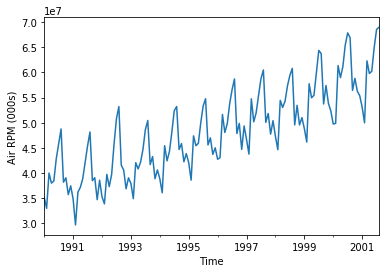

In [13]:
# plot the series
ax = pre_event.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Air RPM (000s)')

plt.show()

The components that appear in the series are trend and seasonality

The smoothing method that would be adequate for forecasting the seasonally adjusted time series shown in Figure 18.6 is Holt-Winter's exponential smoothing

Relationship between Moving Average and Simple Exponential Smoothing: Assume that we apply a moving average to a series, using a very short window span. If we wanted to achieve an equivalent result using simple exponential smoothing, the value the smoothing coefficient would take is 2/w + 1.

To forecast sales in Jan 1999 given information until Dec 1998 and using a moving average with window w = 4, we would take the average sales during the most recent 4 months(Sept 98 to Dec 98). Sales forecast = 27+31+58+63/4 = 44.75

The forecast error = 59-44.75 = 14.25

If the value of zero is obtained for the trend smoothing constant, this means that there is no trend.

The danger of using the optimal smoothing contants values is that there is a high tendency of overfitting the training set when that is done and this would have a bad effect on new dataset that the data hasn't seen before.